# Model Selection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import the linear models from scikit-learn
from sklearn import linear_model
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_validate, train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,RandomForestRegressor

%matplotlib inline

## BIO

In [2]:
##Load the data 
BIO_train_0 = pd.read_csv("BIO/BIO_Group0_training.csv",index_col=[0])
print('Train:', BIO_train_0['Report Date'].iloc[0], 'to',BIO_train_0['Report Date'].iloc[-1])
print('Shape', BIO_train_0.shape)
#BIO_val_0 = 

BIO_test_0 = pd.read_csv("BIO/BIO_Group0_testing.csv",index_col=[0])
print('Test:', BIO_test_0['Report Date'].min(), 'to',BIO_test_0['Report Date'].max())
print('Shape', BIO_test_0.shape)

Train: 2020/3/2 to 2020/12/31
Shape (305, 7)
Test: 2021-01-01 to 2021-06-30
Shape (181, 7)


In [3]:
BIO_train_0['Return'] = BIO_train_0['Stock price'].pct_change()
BIO_train_0['Next Day Return'] = BIO_train_0['Return'].shift(-1)
BIO_train_0['Next Day Y_boolean'] = BIO_train_0['Y_boolean'].shift(-1)
BIO_train_0 = BIO_train_0.iloc[:-1]

BIO_test_0['Return'] = BIO_test_0['Stock price'].pct_change()
BIO_test_0['Next Day Return'] = BIO_test_0['Return'].shift(-1)
BIO_test_0['Next Day Y_boolean'] = BIO_test_0['Y_boolean'].shift(-1)
BIO_test_0 = BIO_test_0.iloc[:-1]

In [4]:
BIO_train_0

,Report Date,Stock price,Y_boolean,Dummy_Dividends,Interest Coverage,Net Profit Margin,RSI_ratio,Return,Next Day Return,Next Day Y_boolean
0,2020/3/2,368.950012,1,0,0.07402,0.000000,0.345478,NaN,0.002846,0.0
1,2020/3/3,370.000000,0,0,0.07402,0.000000,0.345478,0.002846,0.040351,1.0
2,2020/3/4,384.929993,1,0,0.07402,0.000000,0.345478,0.040351,0.004546,1.0
3,2020/3/5,386.679993,1,0,0.07402,0.000000,0.345478,0.004546,-0.031344,-1.0
4,2020/3/6,374.559998,-1,0,0.07402,0.000000,0.345478,-0.031344,-0.020664,-1.0
...,...,...,...,...,...,...,...,...,...,...
299,2020/12/26,573.529999,0,0,0.00000,0.798007,0.164341,-0.001341,-0.001343,0.0
300,2020/12/27,572.759995,0,0,0.00000,0.798007,0.089561,-0.001343,-0.001344,0.0
301,2020/12/28,571.989990,0,0,0.00000,0.798007,0.014782,-0.001344,0.005122,1.0
302,2020/12/29,574.919983,1,0,0.00000,0.798007,0.122708,0.005122,-0.000156,0.0


In [5]:
BIO_test_0

,Report Date,Stock price,Y_boolean,Dummy_Dividends,Interest Coverage,Net Profit Margin,RSI_ratio,Return,Next Day Return,Next Day Y_boolean
0,2021-01-01,581.020004,-1,0.0,1.000000,1.0000,0.487185,NaN,-0.003305,-1.0
1,2021-01-02,579.100006,-1,0.0,1.000000,1.0000,0.450982,-0.003305,-0.003315,-1.0
2,2021-01-03,577.180008,-1,0.0,1.000000,1.0000,0.414778,-0.003315,-0.003327,-1.0
3,2021-01-04,575.260010,-1,0.0,1.000000,1.0000,0.378575,-0.003327,0.015419,1.0
4,2021-01-05,584.130005,1,0.0,1.000000,1.0000,0.551551,0.015419,0.048054,1.0
...,...,...,...,...,...,...,...,...,...,...
175,2021-06-25,633.559998,0,0.0,2.791308,0.1537,0.437018,0.002627,0.005335,1.0
176,2021-06-26,636.940002,1,0.0,2.791308,0.1537,0.435792,0.005335,0.005307,1.0
177,2021-06-27,640.320007,1,0.0,2.791308,0.1537,0.434566,0.005307,0.005279,1.0
178,2021-06-28,643.700012,1,0.0,2.791308,0.1537,0.433339,0.005279,0.002890,0.0


In [6]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

BIO_train_0_features = BIO_train_0.iloc[:,4:7]
BIO_train_0_target =BIO_train_0["Next Day Y_boolean"]
BIO_test_0_features = BIO_test_0.iloc[:,4:7]
BIO_test_0_target =BIO_test_0["Next Day Y_boolean"]

rf = RandomForestClassifier(random_state=0, 
                            n_jobs=-1, 
                            n_estimators=100,
                            class_weight='balanced'
                           )
model = rf.fit(BIO_train_0_features,BIO_train_0_target)
print("training score" , model.score(BIO_train_0_features,BIO_train_0_target))
print("testing score" , model.score(BIO_test_0_features,BIO_test_0_target))

training score 0.9703947368421053
testing score 0.37222222222222223


In [20]:
import pyfolio as pf
from finrl.plot import backtest_plot

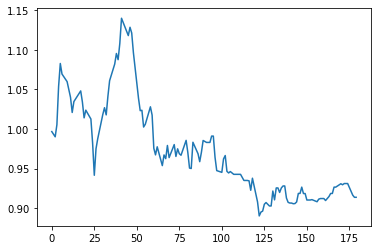

In [8]:
df = BIO_test_0.copy()
df['Report Date'] = pd.to_datetime(df['Report Date'])
df['predicted'] = model.predict(BIO_test_0_features)
df['portfolio return'] = df['predicted'] * df['Next Day Return']
df['portfolio cumulative return'] = np.cumprod(df['portfolio return'] + 1)
plt.plot(df['portfolio cumulative return'])

In [9]:
returns = pd.Series(df['portfolio return'].values,
                    pd.to_datetime(df['Report Date'].dt.strftime("%Y-%m-%d %H:%M:%S+00:00").values)).dropna()
returns.index.name = 'date'

In [10]:
returns

date
2021-01-01 00:00:00+00:00   -0.003305
2021-01-02 00:00:00+00:00   -0.003315
2021-01-03 00:00:00+00:00   -0.003327
2021-01-04 00:00:00+00:00    0.015419
2021-01-05 00:00:00+00:00    0.048054
                               ...   
2021-06-25 00:00:00+00:00   -0.005335
2021-06-26 00:00:00+00:00   -0.005307
2021-06-27 00:00:00+00:00   -0.005279
2021-06-28 00:00:00+00:00   -0.002890
2021-06-29 00:00:00+00:00   -0.000000
Length: 180, dtype: float64

In [26]:
df_account_value = df[['Report Date', 'portfolio cumulative return']]
df_account_value.columns = ['date', 'account_value']
df_account_value

,date,account_value
0,2021-01-01,0.996695
1,2021-01-02,0.993391
2,2021-01-03,0.990086
3,2021-01-04,1.005353
4,2021-01-05,1.053664
...,...,...
175,2021-06-25,0.926051
176,2021-06-26,0.921137
177,2021-06-27,0.916275
178,2021-06-28,0.913627


[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (122, 8)


Start date,2021-01-01
End date,2021-06-29
Total months,8
,Backtest
Annual return,-11.47%
Cumulative returns,-8.334%
Annual volatility,18.974%
Sharpe ratio,-0.55
Calmar ratio,-0.52
Stability,0.69
Max drawdown,-21.921%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,21.92,2021-02-11,2021-05-03,NaT,NaN
1,13.05,2021-01-06,2021-01-26,2021-02-08,24
2,0.71,2021-02-08,2021-02-09,2021-02-10,3
3,0.66,2021-01-01,2021-01-03,2021-01-04,2
4,NaN,NaT,NaT,NaT,NaN


Stress Events,mean,min,max
New Normal,-0.04%,-4.16%,4.81%


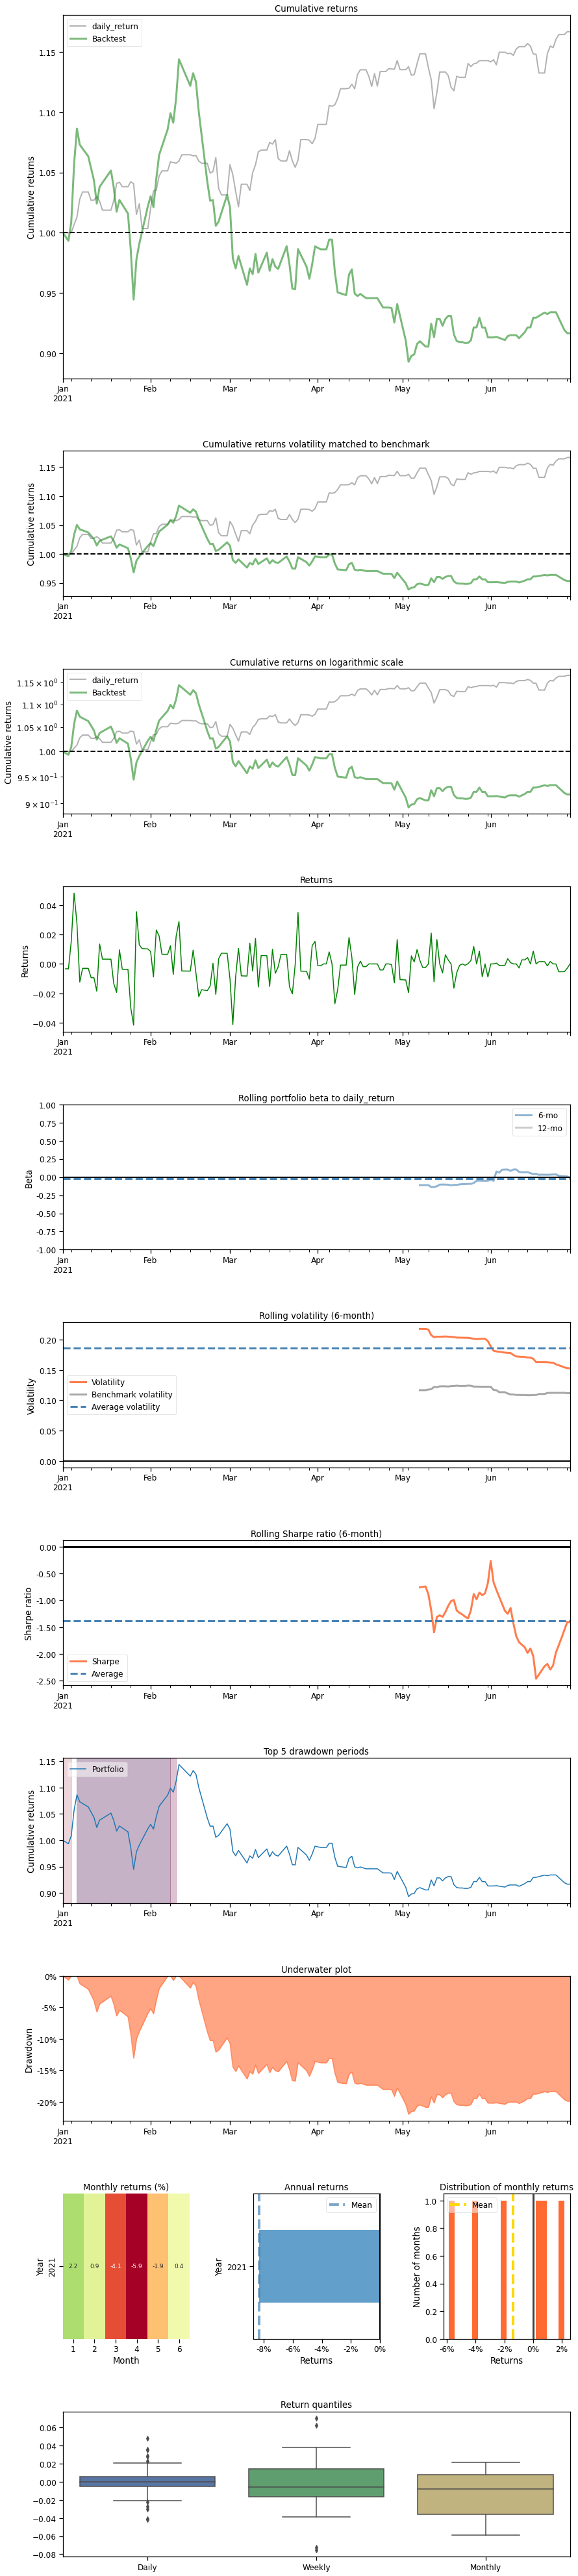

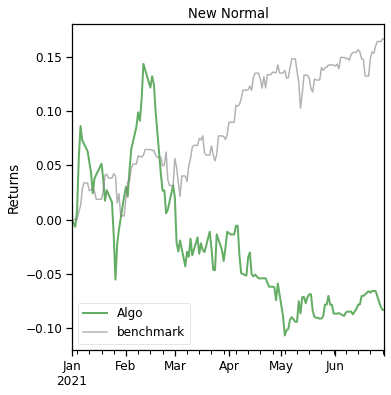

In [30]:
backtest_plot(df_account_value, 
              baseline_ticker='SPY',
              baseline_start = '2021-01-01',
              baseline_end = '2021-06-29')

Start date,2021-01-01
End date,2021-06-29
Total months,8
,Backtest
Annual return,-11.88%
Cumulative returns,-8.637%
Annual volatility,18.924%
Sharpe ratio,-0.57
Calmar ratio,-0.54
Stability,0.68
Max drawdown,-21.921%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,21.92,2021-02-11,2021-05-03,NaT,NaN
1,13.05,2021-01-06,2021-01-26,2021-02-08,24
2,0.71,2021-02-08,2021-02-09,2021-02-10,3
3,0.66,2021-01-01,2021-01-03,2021-01-04,2
4,NaN,NaT,NaT,NaT,NaN


/opt/anaconda3/lib/python3.9/site-packages/pyfolio/timeseries.py:1258: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version.  Use a timezone-aware object instead.
  period = returns_dupe.loc[start:end]


Stress Events,mean,min,max
New Normal,-0.04%,-4.16%,4.81%


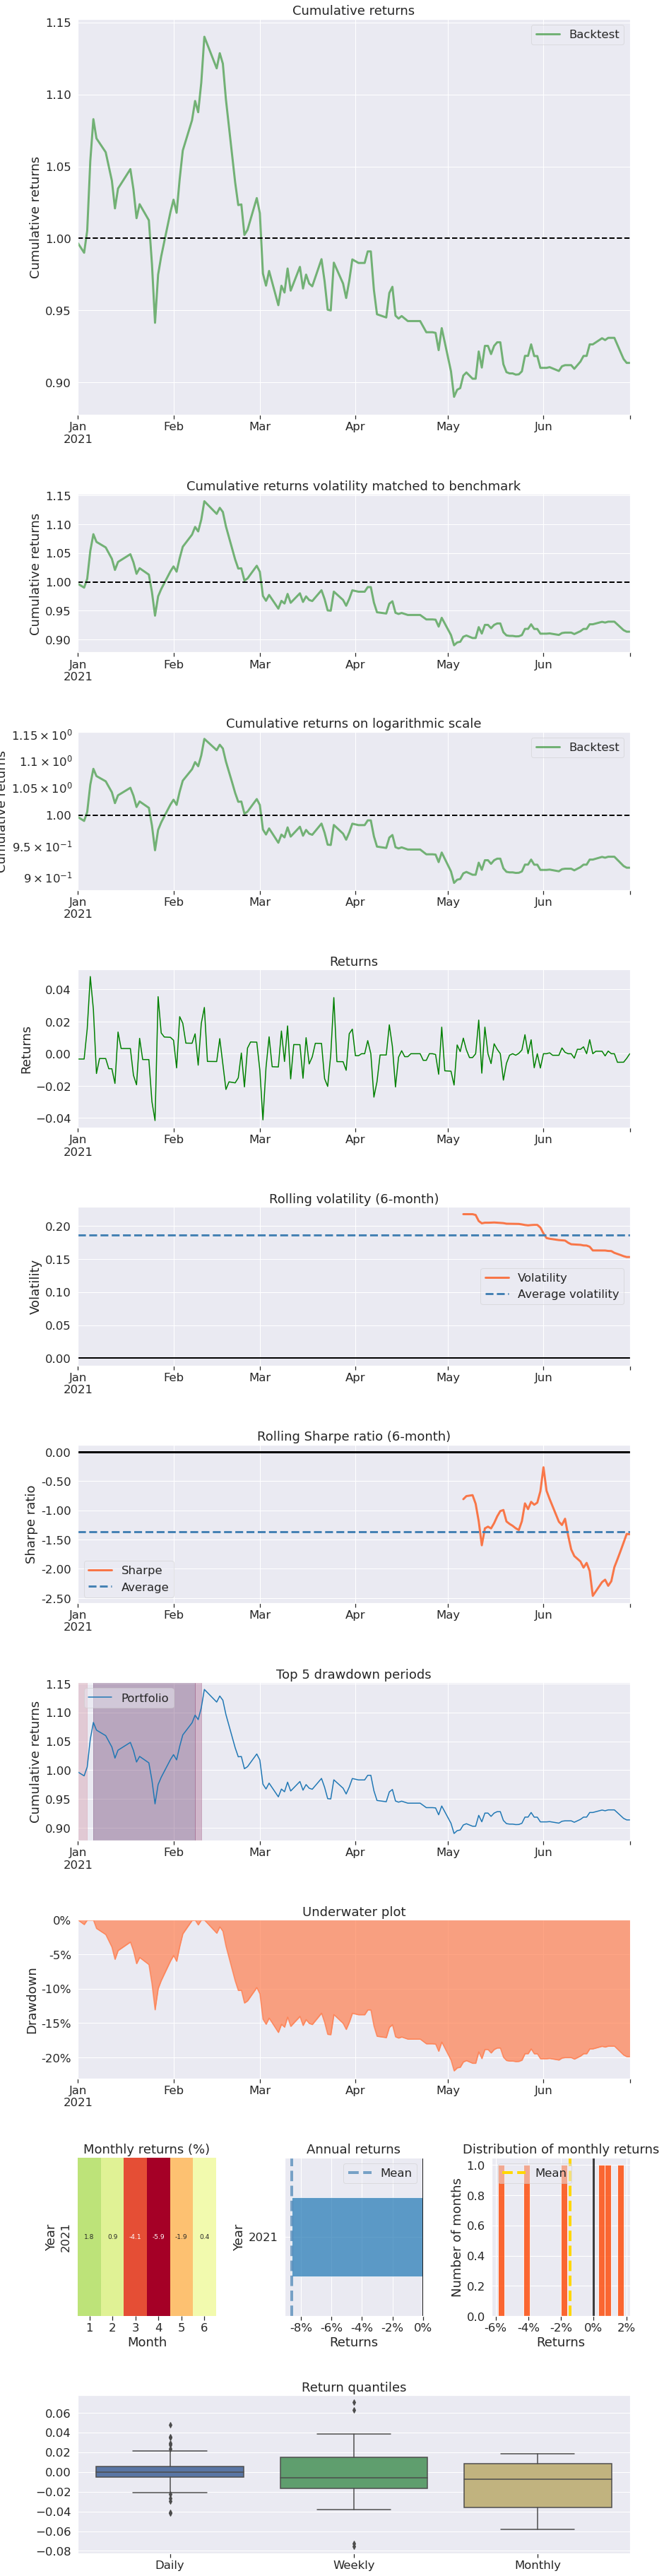

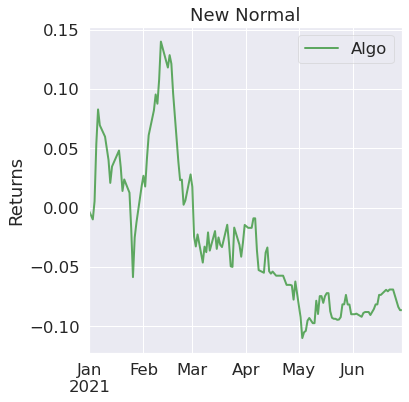

In [12]:
pf.create_full_tear_sheet(returns)

In [ ]:
for column in BIO_train_0.columns[4:7]:
    plt.plot(BIO_train_0_features[column])
    plt.show()

In [ ]:
BIO_train_1 = pd.read_csv("BIO/BIO_Group1_training.csv",index_col=[0])
print('Train:', BIO_train_1['Report Date'].min(), 'to',BIO_train_1['Report Date'].max())
print('Shape', BIO_train_1.shape)
BIO_test_1 = pd.read_csv("BIO/BIO_Group1_testing.csv",index_col=[0])
print('Test:', BIO_test_1['Report Date'].min(), 'to',BIO_test_1['Report Date'].max())
print('Shape', BIO_test_1.shape)

In [ ]:
BIO_train_1

In [ ]:
BIO_train_1_features = BIO_train_1.iloc[:,7:18]
BIO_train_1_target =BIO_train_1["Y_boolean"]
BIO_test_1_features = BIO_test_1.iloc[:,7:18]
BIO_test_1_target =BIO_test_1["Y_boolean"]

rf = RandomForestClassifier(random_state=0, 
                            n_jobs=-1, 
                            n_estimators=100,
                            class_weight='balanced'
                           )
model = rf.fit(BIO_train_1_features,BIO_train_1_target)
print("training score" , model.score(BIO_train_1_features,BIO_train_1_target))
print("testing score" , model.score(BIO_test_1_features,BIO_test_1_target))

In [ ]:
for column in BIO_train_1.columns[7:18]:
    plt.plot(BIO_train_1_features[column])
    plt.show()

In [ ]:
BIO_train_2 = pd.read_csv("BIO/BIO_Group2_training.csv",index_col=[0])
print('Train:', BIO_train_2['Report Date'].min(), 'to',BIO_train_2['Report Date'].max())
print('Shape', BIO_train_2.shape)
BIO_test_2 = pd.read_csv("BIO/BIO_Group2_testing.csv",index_col=[0])
print('Test:', BIO_test_2['Report Date'].min(), 'to',BIO_test_2['Report Date'].max())
print('Shape', BIO_test_2.shape)

In [ ]:
BIO_train_2_features = BIO_train_2.iloc[:,3:13]
BIO_train_2_target =BIO_train_2["Y_boolean"]
BIO_test_2_features = BIO_test_2.iloc[:,3:13]
BIO_test_2_target =BIO_test_2["Y_boolean"]

model = rf.fit(BIO_train_2_features,BIO_train_2_target)
print("training score" , model.score(BIO_train_2_features,BIO_train_2_target))
print("testing score" , model.score(BIO_test_2_features,BIO_test_2_target))

In [ ]:
BIO_train_3 = pd.read_csv("BIO/BIO_Group3_training.csv",index_col=[0])
print('Train:', BIO_train_3['Report Date'].min(), 'to',BIO_train_3['Report Date'].max())
print('Shape', BIO_train_3.shape)
BIO_test_3 = pd.read_csv("BIO/BIO_Group1_testing.csv",index_col=[0])
print('Test:', BIO_test_3['Report Date'].min(), 'to',BIO_test_3['Report Date'].max())
print('Shape', BIO_test_3.shape)

In [ ]:
BIO_train_3_features = BIO_train_3.iloc[:,3:18]
BIO_train_3_target =BIO_train_3["Y_boolean"]
BIO_test_3_features = BIO_test_3.iloc[:,3:18]
BIO_test_3_target =BIO_test_3["Y_boolean"]

model = rf.fit(BIO_train_3_features,BIO_train_3_target)
print("training score" , model.score(BIO_train_3_features,BIO_train_3_target))
print("testing score" , model.score(BIO_test_3_features,BIO_test_3_target))

In [ ]:
BIO_train_4 = pd.read_csv("BIO/BIO_Group4_training.csv",index_col=[0])
print('Train:', BIO_train_4['Report Date'].min(), 'to',BIO_train_4['Report Date'].max())
print('Shape', BIO_train_4.shape)
BIO_test_4 = pd.read_csv("BIO/BIO_Group4_testing.csv",index_col=[0])
print('Test:', BIO_test_4['Report Date'].min(), 'to',BIO_test_4['Report Date'].max())
print('Shape', BIO_test_4.shape)

In [ ]:
BIO_train_4_features = BIO_train_4.iloc[:,3:10]
BIO_train_4_target =BIO_train_4["Y_boolean"]
BIO_test_4_features = BIO_test_4.iloc[:,3:10]
BIO_test_4_target =BIO_test_4["Y_boolean"]

model = rf.fit(BIO_train_4_features,BIO_train_4_target)
print("training score" , model.score(BIO_train_4_features,BIO_train_4_target))
print("testing score" , model.score(BIO_test_4_features,BIO_test_4_target))

## Logistic Regression 

In [ ]:
# RobustScaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).
log_l2 = make_pipeline(RobustScaler(), LogisticRegression(max_iter=1000, penalty='l2', tol=0.001, solver='newton-cg'))
model = log_l2.fit(BIO_train_0_features,BIO_train_0_target)
print("training score" , model.score(BIO_train_0_features,BIO_train_0_target))
print("testing score" , model.score(BIO_test_0_features,BIO_test_0_target))


In [ ]:
model =log_l2.fit(BIO_train_1_features,BIO_train_1_target)
print("training score" , model.score(BIO_train_1_features,BIO_train_1_target))
print("testing score" , model.score(BIO_test_1_features,BIO_test_1_target))

In [ ]:
model = log_l2.fit(BIO_train_2_features,BIO_train_2_target)
print("training score" , model.score(BIO_train_2_features,BIO_train_2_target))
print("testing score" , model.score(BIO_test_2_features,BIO_test_2_target))

In [ ]:
model =log_l2.fit(BIO_train_3_features,BIO_train_3_target)
print("training score" , model.score(BIO_train_3_features,BIO_train_3_target))
print("testing score" , model.score(BIO_test_3_features,BIO_test_3_target))

In [ ]:
model = log_l2.fit(BIO_train_4_features,BIO_train_4_target)
print("training score" , model.score(BIO_train_4_features,BIO_train_4_target))
print("testing score" , model.score(BIO_test_4_features,BIO_test_4_target))

In [ ]:
sgdc_j = SGDClassifier(alpha=0.0001, epsilon=0.01, eta0=0.5, random_state=12345)
model = sgdc_j.fit(BIO_train_0_features,BIO_train_0_target)
print("training score" , model.score(BIO_train_0_features,BIO_train_0_target))
print("testing score" , model.score(BIO_test_0_features,BIO_test_0_target))

In [ ]:
model = sgdc_j.fit(BIO_train_1_features,BIO_train_1_target)
print("training score" , model.score(BIO_train_1_features,BIO_train_1_target))
print("testing score" , model.score(BIO_test_1_features,BIO_test_1_target))

In [ ]:
model = sgdc_j.fit(BIO_train_2_features,BIO_train_2_target)
print("training score" , model.score(BIO_train_2_features,BIO_train_2_target))
print("testing score" , model.score(BIO_test_2_features,BIO_test_2_target))

In [ ]:
model = sgdc_j.fit(BIO_train_3_features,BIO_train_3_target)
print("training score" , model.score(BIO_train_3_features,BIO_train_3_target))
print("testing score" , model.score(BIO_test_3_features,BIO_test_3_target))

In [ ]:
model = sgdc_j.fit(BIO_train_4_features,BIO_train_4_target)
print("training score" , model.score(BIO_train_4_features,BIO_train_4_target))
print("testing score" , model.score(BIO_test_4_features,BIO_test_4_target))


## Support Vector Machine (SVM)

In [ ]:
svm = make_pipeline(RobustScaler(), SVC(gamma='auto'))
model = svm.fit(BIO_train_0_features,BIO_train_0_target)
print("training score" , model.score(BIO_train_0_features,BIO_train_0_target))
print("testing score" , model.score(BIO_test_0_features,BIO_test_0_target))

In [ ]:
model = svm.fit(BIO_train_1_features,BIO_train_1_target)
print("training score" , model.score(BIO_train_1_features,BIO_train_1_target))
print("testing score" , model.score(BIO_test_1_features,BIO_test_1_target))

In [ ]:
model = svm.fit(BIO_train_2_features,BIO_train_2_target)
print("training score" , model.score(BIO_train_2_features,BIO_train_2_target))
print("testing score" , model.score(BIO_test_2_features,BIO_test_2_target))

In [ ]:
model = svm.fit(BIO_train_3_features,BIO_train_3_target)
print("training score" , model.score(BIO_train_3_features,BIO_train_3_target))
print("testing score" , model.score(BIO_test_3_features,BIO_test_3_target))

In [ ]:
model = svm.fit(BIO_train_4_features,BIO_train_4_target)
print("training score" , model.score(BIO_train_4_features,BIO_train_4_target))
print("testing score" , model.score(BIO_test_4_features,BIO_test_4_target))


# ZTS

In [ ]:
## Random Forest
ZTS_train_0 = pd.read_csv("ZTS/ZTS_Group0_training.csv",index_col=[0])
print('Train:', ZTS_train_0['Report Date'].min(), 'to',ZTS_train_0['Report Date'].max())
print('Shape', ZTS_train_0.shape)
ZTS_test_0 = pd.read_csv("ZTS/ZTS_Group0_testing.csv",index_col=[0])
print('Test:',ZTS_test_0['Report Date'].min(), 'to',ZTS_test_0['Report Date'].max())
print('Shape', ZTS_test_0.shape)


In [ ]:
ZTS_train_0_features = ZTS_train_0.iloc[:,3:11]
ZTS_train_0_target = ZTS_train_0["Y_boolean"]
ZTS_test_0_features = ZTS_test_0.iloc[:,3:11]
ZTS_test_0_target =ZTS_test_0["Y_boolean"]

model = rf.fit(ZTS_train_0_features,ZTS_train_0_target)
print("training score" , model.score(ZTS_train_0_features,ZTS_train_0_target))
print("testing score" , model.score(ZTS_test_0_features,ZTS_test_0_target))

In [ ]:
ZTS_train_1 = pd.read_csv("ZTS/ZTS_Group1_training.csv",index_col=[0])
print('Train:', ZTS_train_1['Report Date'].min(), 'to',ZTS_train_1['Report Date'].max())
print('Shape', ZTS_train_1.shape)
ZTS_test_1 = pd.read_csv("ZTS/ZTS_Group1_testing.csv",index_col=[0])
print('Test:',ZTS_test_1['Report Date'].min(), 'to',ZTS_test_1['Report Date'].max())
print('Shape', ZTS_test_1.shape)

In [ ]:
ZTS_train_1_features = ZTS_train_1.iloc[:,3:12]
ZTS_train_1_target = ZTS_train_1["Y_boolean"]
ZTS_test_1_features = ZTS_test_1.iloc[:,3:12]
ZTS_test_1_target =ZTS_test_1["Y_boolean"]

model = rf.fit(ZTS_train_1_features,ZTS_train_1_target)
print("training score" , model.score(ZTS_train_1_features,ZTS_train_1_target))
print("testing score" , model.score(ZTS_test_1_features,ZTS_test_1_target))

In [ ]:
ZTS_train_2 = pd.read_csv("ZTS/ZTS_Group2_training.csv",index_col=[0])
print('Train:', ZTS_train_2['Report Date'].min(), 'to',ZTS_train_2['Report Date'].max())
print('Shape', ZTS_train_2.shape)
ZTS_test_2 = pd.read_csv("ZTS/ZTS_Group2_testing.csv",index_col=[0])
print('Test:',ZTS_test_2['Report Date'].min(), 'to',ZTS_test_2['Report Date'].max())
print('Shape', ZTS_test_2.shape)

In [ ]:
ZTS_train_2_features = ZTS_train_2.iloc[:,3:11]
ZTS_train_2_target = ZTS_train_2["Y_boolean"]
ZTS_test_2_features = ZTS_test_2.iloc[:,3:11]
ZTS_test_2_target =ZTS_test_2["Y_boolean"]

model = rf.fit(ZTS_train_2_features,ZTS_train_2_target)
print("training score" , model.score(ZTS_train_2_features,ZTS_train_2_target))
print("testing score" , model.score(ZTS_test_2_features,ZTS_test_2_target))

In [ ]:
ZTS_train_3 = pd.read_csv("ZTS/ZTS_Group3_training.csv",index_col=[0])
print('Train:', ZTS_train_3['Report Date'].min(), 'to',ZTS_train_3['Report Date'].max())
print('Shape', ZTS_train_3.shape)
ZTS_test_3 = pd.read_csv("ZTS/ZTS_Group3_testing.csv",index_col=[0])
print('Test:',ZTS_test_3['Report Date'].min(), 'to',ZTS_test_3['Report Date'].max())
print('Shape', ZTS_test_3.shape)

In [ ]:
ZTS_train_3_features = ZTS_train_3.iloc[:,3:16]
ZTS_train_3_target = ZTS_train_3["Y_boolean"]
ZTS_test_3_features = ZTS_test_3.iloc[:,3:16]
ZTS_test_3_target =ZTS_test_3["Y_boolean"]

model = rf.fit(ZTS_train_3_features,ZTS_train_3_target)
print("training score" , model.score(ZTS_train_3_features,ZTS_train_3_target))
print("testing score" , model.score(ZTS_test_3_features,ZTS_test_3_target))

In [ ]:
ZTS_train_4 = pd.read_csv("ZTS/ZTS_Group4_training.csv",index_col=[0])
print('Train:', ZTS_train_4['Report Date'].min(), 'to',ZTS_train_4['Report Date'].max())
print('Shape', ZTS_train_4.shape)
ZTS_test_4 = pd.read_csv("ZTS/ZTS_Group4_testing.csv",index_col=[0])
print('Test:',ZTS_test_4['Report Date'].min(), 'to',ZTS_test_4['Report Date'].max())
print('Shape', ZTS_test_4.shape)

In [ ]:
ZTS_train_4_features = ZTS_train_4.iloc[:,3:16]
ZTS_train_4_target = ZTS_train_4["Y_boolean"]
ZTS_test_4_features = ZTS_test_4.iloc[:,3:16]
ZTS_test_4_target =ZTS_test_4["Y_boolean"]

model = rf.fit(ZTS_train_4_features,ZTS_train_4_target)
print("training score" , model.score(ZTS_train_4_features,ZTS_train_4_target))
print("testing score" , model.score(ZTS_test_4_features,ZTS_test_4_target))

In [ ]:
## Logistic Regression 
sgdc_j = SGDClassifier(alpha=0.0001, epsilon=0.01, eta0=0.5, random_state=12345)
model = sgdc_j.fit(ZTS_train_0_features,ZTS_train_0_target)
print("training score" , model.score(ZTS_train_0_features,ZTS_train_0_target))
print("testing score" , model.score(ZTS_test_0_features,ZTS_test_0_target))

In [ ]:
model = sgdc_j.fit(ZTS_train_1_features,ZTS_train_1_target)
print("training score" , model.score(ZTS_train_1_features,ZTS_train_1_target))
print("testing score" , model.score(ZTS_test_1_features,ZTS_test_1_target))

In [ ]:
model = sgdc_j.fit(ZTS_train_2_features,ZTS_train_2_target)
print("training score" , model.score(ZTS_train_2_features,ZTS_train_2_target))
print("testing score" , model.score(ZTS_test_2_features,ZTS_test_2_target))

In [ ]:
model = sgdc_j.fit(ZTS_train_3_features,ZTS_train_3_target)
print("training score" , model.score(ZTS_train_3_features,ZTS_train_3_target))
print("testing score" , model.score(ZTS_test_3_features,ZTS_test_3_target))

In [ ]:
model = sgdc_j.fit(ZTS_train_4_features,ZTS_train_4_target)
print("training score" , model.score(ZTS_train_4_features,ZTS_train_4_target))
print("testing score" , model.score(ZTS_test_4_features,ZTS_test_4_target))

## Support Vector Machine (SVM)

In [ ]:
ZTS_train_0_features

In [ ]:
svm = make_pipeline(RobustScaler(), SVC(gamma='auto'))
model = svm.fit(ZTS_train_0_features,ZTS_train_0_target)
print("training score" , model.score(ZTS_train_0_features,ZTS_train_0_target))
print("testing score" , model.score(ZTS_test_0_features,ZTS_test_0_target))

In [ ]:
model = svm.fit(ZTS_train_1_features,ZTS_train_1_target)
print("training score" , model.score(ZTS_train_1_features,ZTS_train_1_target))
print("testing score" , model.score(ZTS_test_1_features,ZTS_test_1_target))

In [ ]:
model = svm.fit(ZTS_train_2_features,ZTS_train_2_target)
print("training score" , model.score(ZTS_train_2_features,ZTS_train_2_target))
print("testing score" , model.score(ZTS_test_2_features,ZTS_test_2_target))

In [ ]:
model = svm.fit(ZTS_train_3_features,ZTS_train_3_target)
print("training score" , model.score(ZTS_train_3_features,ZTS_train_3_target))
print("testing score" , model.score(ZTS_test_3_features,ZTS_test_3_target))

In [ ]:
model = svm.fit(ZTS_train_4_features,ZTS_train_4_target)
print("training score" , model.score(ZTS_train_4_features,ZTS_train_4_target))
print("testing score" , model.score(ZTS_test_4_features,ZTS_test_4_target))